Dataset from https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [73]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


df = pd.read_csv('./heart.csv')
df['age']=df['age'].div(10)
df['trtbps']=df['trtbps'].div(100)
df['chol']=df['chol'].div(100)
df['thalachh']=df['thalachh'].div(100)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,6.3,1,3,1.45,2.33,1,0,1.50,0,2.3,0,0,1,1
1,3.7,1,2,1.30,2.50,0,1,1.87,0,3.5,0,0,2,1
2,4.1,0,1,1.30,2.04,0,0,1.72,0,1.4,2,0,2,1
3,5.6,1,1,1.20,2.36,0,1,1.78,0,0.8,2,0,2,1
4,5.7,0,0,1.20,3.54,0,1,1.63,1,0.6,2,0,2,1


Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

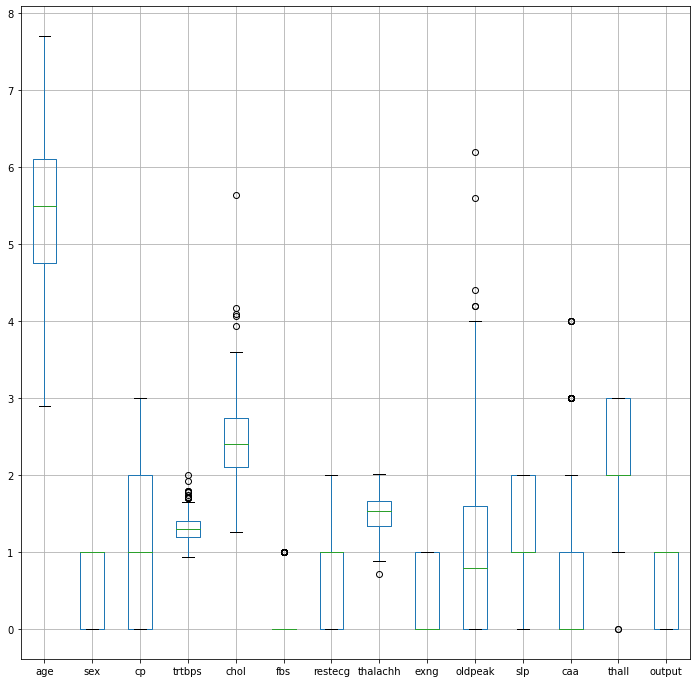

In [74]:
plt.figure(figsize = (12,12))
df.boxplot()

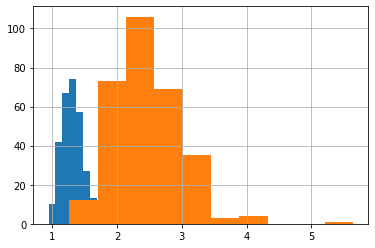

In [75]:
df["trtbps"].hist()
df["chol"].hist()

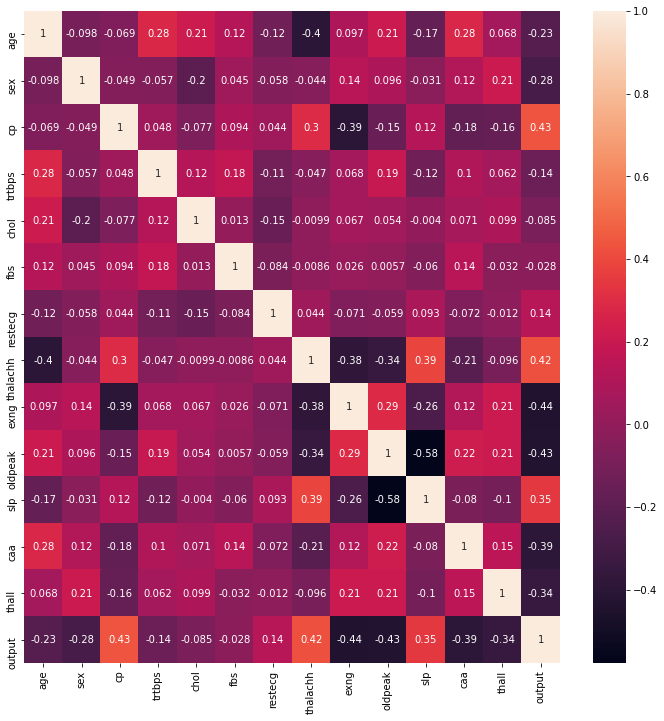

In [76]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(),annot=True)

70% Training 

15% Testing 

15% Validation

In [77]:
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop("output", axis=1).to_numpy()
y = df["output"].to_numpy()

In [78]:
# Splitting the dataset to our desired proportions
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y,train_size=0.70, test_size=0.3, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(X_test_val, y_test_val,train_size=0.50, test_size=0.5, random_state=0)

In [79]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

#(Possible solution) For better accuracy: attempt to scale. 
#clf= classifier
LR = LogisticRegression(solver='lbfgs', max_iter=1000)
clf= LR.fit(X_train, y_train)
clf.predict(X[:2,:])
clf.score(X_train, y_train)
#LR = LogisticRegression(random_state=0).fit(X_train, y_train)

0.8537735849056604

In [80]:
# Random Forest Regressor
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=400, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.25233695652173915
Mean Squared Error: 0.11471589673913045
Root Mean Squared Error: 0.33869735271940116


In [81]:

#Random Forest Classifier 
#https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=400, random_state=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[20  3]
 [ 3 20]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.87      0.87      0.87        23

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46

0.8695652173913043


In [82]:
#Neural Net Multi-layer Perceptron (MLP)
#https://scikit-learn.org/stable/modules/neural_networks_supervised.html

from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                        hidden_layer_sizes=(5,2), random_state=1)

clf_mlp.fit(X_train, y_train)
clf_mlp.predict(X[:2,:])
clf_mlp.score(X_train, y_train)

0.9669811320754716

In [85]:
#SVM 
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))


#Minimize bottom-left (false-positives)

0.8260869565217391


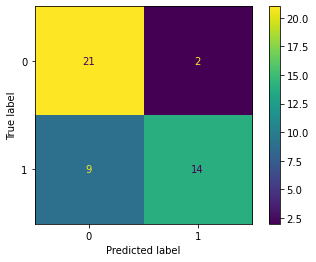

In [84]:

from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize = (12,12))
plot_confusion_matrix(clf_mlp, X_test, y_test)  
plt.show()

In [0]:
#Next Steps
# - Multicoliearity
# - Outliers (Min false-positives)  -> Adjust class weights or hyperparameter tuning
# - Comfortable w/ ~89-92 accuracy
# - Understand models (i.e., neural net, forest, etc...): More ensemble methods
# - Work on scaling 